### Random forest create multiple decision tree either by spliting the data set or by randomly selecting the features.
### Output of all decision trees are counted in case of classifier and average is calculated in case of regression.
### Random forest resolve the overfiting issue of decision tree.
### Random forest and decision tree both are not good for extrapolation in regression.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [96]:
iris = load_iris();
irisDF = pd.DataFrame(iris.data,columns=iris.feature_names)
irisDF["type"] = iris.target_names[iris.target];
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
trainX,testX,trainy,testy = train_test_split(iris.data,iris.target,random_state=5);
testX[:5]

array([[5.8, 2.7, 3.9, 1.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [4.4, 3.2, 1.3, 0.2],
       [7.2, 3.6, 6.1, 2.5]])

In [193]:
#if random state isnot set it will create different dt set every time we execute
rfClassifier = RandomForestClassifier(n_estimators=10,max_depth=3,random_state=5).fit(trainX,trainy);
rfClassifier.score(testX,testy)

0.9736842105263158

In [210]:
dtClassifier = DecisionTreeClassifier(max_depth=3,random_state=5).fit(trainX,trainy);
dtClassifier.score(testX,testy)

0.9473684210526315

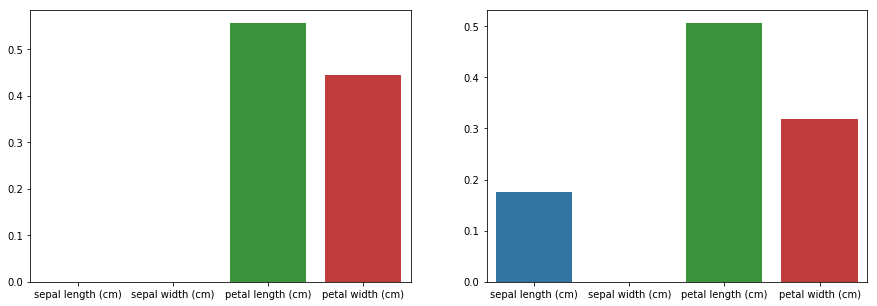

In [192]:
### Random Forest consider all feature and prevent overfitting
plt.figure(figsize=(15,5));
plt.subplot(121);
sns.barplot(x=iris.feature_names,y=dtClassifier.feature_importances_);
plt.subplot(122);
sns.barplot(x=iris.feature_names,y=rfClassifier.feature_importances_);